# Coursera ML Ex1 - Linear Regression with Multiple Variables


## Introduction
In this exercise, we build an algorithm to solve a regression problem, that is to predict the  house prices in Portland, Oregon. For demonstration purpose, we use two indenpendent variables (Size of houses and No. of bedrooms) and the target dependent variable is the house price.  The following lists the data file structure. 

VARIABLE DESCRIPTIONS:
* 1st column      Size of the house in sq.ft. 
+ 2nd column      No. of bedrooms 
+ 3rd column      Price of the house  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)

print("Loading data ...")
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]
m = y.size

print("Training data size = %d"%m)
print("List of first 5 input variables:")
print(X[:5])
print("List of first 5 trainning traget:")
print(y[:5])


Loading data ...
Training data size = 47
List of first 5 input variables:
[[ 2104.     3.]
 [ 1600.     3.]
 [ 2400.     3.]
 [ 1416.     2.]
 [ 3000.     4.]]
List of first 5 trainning traget:
[ 399900.  329900.  369000.  232000.  539900.]


## Data Normalization

By looking at the values, the house sizes are a few thousand, but the number of bedrooms is single digit.  We perform feature scaling to transfrom the independent variables to simlar magnitude.

$${ X }_{ norm } = \frac { X-\mu  }{ { \sigma  }^{ 2 } } $$

In [2]:
def featureNormalize(X):
    mu = X.mean(0)
    sigma2 = X.std(0)
    #use auto broadcast
    X_norm = (X-mu)/sigma2
    return (X_norm, mu, sigma2)

X_norm, mu, sigma2 = featureNormalize(X)
print("List of first 5 normalized input variables:")
print(X_norm[:5])


List of first 5 normalized input variables:
[[ 0.13 -0.23]
 [-0.51 -0.23]
 [ 0.51 -0.23]
 [-0.74 -1.55]
 [ 1.27  1.1 ]]


## Cost Function

The hypothesis of our linear regession model is
$${ h }_{ \theta  }({ x })=\sum _{ j=0 }^{ n }{ { \theta  }_{ j }{ { x }_{ j } } }$$
for input data with (n) features, where ${ x }_{ 0 }^{ (i) } = 1$

and the objective of our algorithm is to minimize this cost function:
$$J(\theta )=\frac { 1 }{ 2m } \sum _{ i=1 }^{ m }{ { ({ h }_{ \theta  }({ x }^{ (i) })-{ y }^{ (i) }) }^{ 2 } } $$


In [3]:
def computeCost(X, y, theta):
    # sample size m in scalar
    m = len(y)
    # hypothesis h in (mx1)
    h = X.dot(theta)
    # cost
    J = 1./(2*m)*sum((h-y)**2)
    return J

## Gradient Descent

Batch gradient descent algorithm is used to find the optimal values for $\theta$, and this will result the minimal cost $J(\theta)$ iteratively.

By taking differentiation to the cost function $J(\theta)$ w.r.t. $\theta$, we get:
$$\frac { \partial J({ \theta  }) }{ \partial { \theta  }_{ j } } =\frac { 1 }{ m } \sum _{ i=1 }^{ m }{ \left[ ({ h }_{ \theta  }({ x }^{ (i) })-{ y }^{ (i) }){ \cdot x }_{ j }^{ (i) } \right]  } \quad \forall j\in (0...n)$$

We then apply the following rule to update $\theta$ step by step:
$${ \theta  }_{ j } \Leftarrow { \theta  }_{ j }-\alpha \frac { \partial J({ \theta  }) }{ \partial { \theta  }_{ j } } $$
where $\alpha$ is a constant called learning rate.

With each step of gradient descent, parameters ${ \theta  }_{ j }$ come closer and closer to the optimal values, which will finally achieve the lowest cost $J({ \theta  })$.


In [4]:
def gradientDescent(X, y, init_theta, alpha, niter):
    m = len(y)
    theta = init_theta
    J_hist = np.zeros(niter)
    for t in range(0, niter):
        h = X.dot(theta)
        grad = 1./m * X.T.dot(h-y)
        theta = theta - alpha * grad
        J_hist[t] = computeCost(X, y, theta)
    return (theta, J_hist)

## Train the Model

After defining the functions, we start to train the model.  It takes a moment.  When finished, our trained model is encapsulated in the $\theta$ parameter. We plot the cost over iterration, the arm shaped curve indicates the cost function has converged to minimum.  

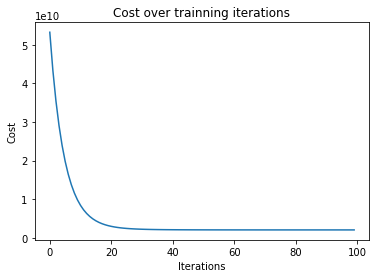

In [5]:
m = len(y)
# prepare design matrix
X_design = np.c_[np.ones(m), X_norm]
n = X.shape[1]
init_theta = np.zeros(n+1)
alpha = 0.1

theta, J_hist = gradientDescent(X_design, y, init_theta, alpha, niter=100)

plt.plot(np.arange(0, 100), J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over trainning iterations')

## Predict New Input

We try to predict the price of a new input of houses, say a house sizes 1650 sq-ft, with 3 bedrooms. It is shown in red in the scatter plot.

For house with 1650 sq-ft and 3 bedrooms, we estimate a price of 293214.163546


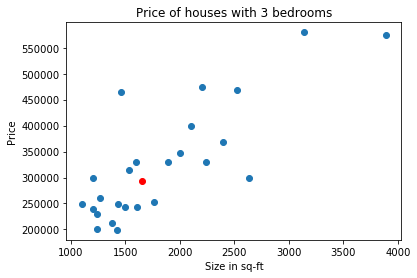

In [6]:
# predict the price of a 1650 sq-ft, 3 br house.
price = 0
X_new = (np.array([1650, 3]) - mu) / sigma2
X_new_design = np.append(1, X_new)
price = X_new_design.dot(theta)
print('For house with 1650 sq-ft and 3 bedrooms, we estimate a price of %f'%price)

X_3 = X[X[:,1]==3][:,0]
y_3 = y[np.where(X[:,1]==3)]
plt.scatter(X_3, y_3)
plt.xlabel('Size in sq-ft')
plt.ylabel('Price')
plt.title('Price of houses with 3 bedrooms')
plt.scatter(1650, price, c='r')
